In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
f = open('pilot_results_compilation.csv','r')
data = pd.read_csv(f)

data.set_index('ResponseId')
data.head()

,ResponseId,TargetId,QualtricsId,IPAddress,Latitude,Longitude,StartDate_1,EndDate_1,StartDate_2,EndDate_2,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
0,1,1,R_12unZMHjJEzjU7w,223.38.21.205,37.598495,126.978302,3/17/20 12:32,3/17/20 12:40,3/17/20 12:40,3/17/20 12:47,...,22.0,21.0,43.0,19.0,55.0,12.0,21.0,28.0,22.0,41.0
1,2,2,R_1MPUDZpgLwIxe1A,175.223.22.95,37.598495,126.978302,3/18/20 11:17,3/18/20 11:25,3/18/20 11:26,3/18/20 11:29,...,22.0,17.0,39.0,15.0,60.0,18.0,11.0,27.0,18.0,37.0
2,3,2,R_29nM2ZnVIpXduHk,183.104.122.33,35.268005,128.839813,3/18/20 10:29,3/18/20 10:42,3/18/20 10:42,3/18/20 11:17,...,21.0,22.0,43.0,19.0,48.0,15.0,17.0,29.0,25.0,22.0
3,4,2,R_2BsWkDHnnRpZoQ3,211.109.158.40,37.598495,126.978302,3/17/20 21:46,3/17/20 21:59,3/17/20 21:59,3/17/20 22:06,...,18.0,12.0,30.0,20.0,48.0,14.0,10.0,25.0,22.0,35.0
4,5,2,R_27NBh3oSecWIT6D,211.224.126.112,35.872299,128.592407,3/18/20 10:19,3/18/20 10:35,3/18/20 10:36,3/18/20 10:46,...,20.0,18.0,38.0,18.0,49.0,20.0,19.0,34.0,19.0,34.0


In [3]:
# drop irrelevant information
df = data.drop(['QualtricsId', 'IPAddress', 'Latitude', 'Longitude', 'StartDate_1', 'EndDate_1', 'StartDate_2',
               'EndDate_2', 'StartDate_3', 'EndDate_3', 'Duration_1', 'Duration_2', 'Duration_3', 'DurationTotal'],
               axis=1)
df.set_index('ResponseId')
df.head()

,ResponseId,TargetId,Complete,ID,SurveyType,Relationship,Age,Gender,Religion,guess_1,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
0,1,1,True,^oo^,1,NaN,5.0,F,7.0,NaN,...,22.0,21.0,43.0,19.0,55.0,12.0,21.0,28.0,22.0,41.0
1,2,2,True,aeri,2,1.0,3.0,M,7.0,28.0,...,22.0,17.0,39.0,15.0,60.0,18.0,11.0,27.0,18.0,37.0
2,3,2,True,aeri,2,1.0,3.0,M,7.0,31.0,...,21.0,22.0,43.0,19.0,48.0,15.0,17.0,29.0,25.0,22.0
3,4,2,True,aeri,1,NaN,2.0,F,3.0,NaN,...,18.0,12.0,30.0,20.0,48.0,14.0,10.0,25.0,22.0,35.0
4,5,2,True,aeri,2,1.0,2.0,F,7.0,40.0,...,20.0,18.0,38.0,18.0,49.0,20.0,19.0,34.0,19.0,34.0


## 1. Correlation within self, others (each)
- correlation data into csv file
- correlation plot
- z-test for comparison b/w coefficient of self & others -> p values saved into csv file

#### result CSV files: self_corr.csv, others_corr.csv, self_others_coef_comparison.csv, self_others_coef_comparison_sig.csv (only significant ones)

In [4]:
df_1 = df.drop(['ResponseId', 'Complete', 'ID', 'Age', 'Gender', 'Religion'], axis=1)

# only score information
df_scores = df_1.drop(['TargetId', 'Relationship', 'guess_1', 'guess_2', 'guess_3'], axis=1)
# separate self & others
self = df_scores.loc[df_scores['SurveyType'] == 1].drop(['SurveyType'], axis=1)
others = df_scores.loc[df_scores['SurveyType'] == 2].drop(['SurveyType'], axis=1)

self.head()

,FS,BFI_O,BFI_C,BFI_N,BFI_E,BFI_A,PCS9,ERQ10_c,ERQ10_e,ERQ10,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
0,51.0,7.0,12.0,9.0,12.0,11.0,21.0,28.0,12.0,40.0,...,22.0,21.0,43.0,19.0,55.0,12.0,21.0,28.0,22.0,41.0
3,42.0,6.0,10.0,6.0,10.0,9.0,33.0,28.0,20.0,48.0,...,18.0,12.0,30.0,20.0,48.0,14.0,10.0,25.0,22.0,35.0
5,28.0,9.0,5.0,13.0,3.0,7.0,45.0,25.0,20.0,45.0,...,14.0,5.0,19.0,23.0,51.0,5.0,10.0,48.0,24.0,42.0
6,47.0,14.0,10.0,9.0,8.0,12.0,37.0,22.0,14.0,36.0,...,20.0,19.0,39.0,21.0,55.0,15.0,29.0,38.0,28.0,43.0
8,47.0,13.0,12.0,8.0,6.0,10.0,39.0,19.0,11.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
self.shape

(42, 38)

In [6]:
others.shape

(48, 38)

In [7]:
self_corr = self.corr()
self_corr.head()

,FS,BFI_O,BFI_C,BFI_N,BFI_E,BFI_A,PCS9,ERQ10_c,ERQ10_e,ERQ10,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
FS,1.000000,0.269557,0.483402,-0.494799,0.163433,0.444437,-0.460633,0.230048,-0.419176,-0.147775,...,-0.126399,0.269692,0.098036,0.191305,0.259316,-0.086337,0.003611,-0.013698,0.261492,-0.321153
BFI_O,0.269557,1.000000,-0.145687,0.104159,0.080873,0.239025,0.147640,0.051569,-0.490707,-0.328135,...,0.066337,0.188250,0.149376,-0.000412,0.068583,0.155472,0.149478,0.296632,0.535082,0.023779
BFI_C,0.483402,-0.145687,1.000000,-0.314218,-0.073973,0.171641,-0.729807,0.001108,0.214372,0.160192,...,0.123281,0.274714,0.231850,0.332390,0.123040,-0.334625,-0.022584,-0.151945,0.273523,-0.364994
BFI_N,-0.494799,0.104159,-0.314218,1.000000,-0.327830,-0.219464,0.288583,-0.249815,0.237661,-0.001281,...,-0.037931,-0.069450,-0.062156,-0.311915,-0.218548,-0.159551,-0.201206,0.030606,-0.039796,0.432449
BFI_E,0.163433,0.080873,-0.073973,-0.327830,1.000000,0.103671,0.015895,0.266667,-0.489500,-0.173975,...,0.383475,0.412074,0.451757,-0.132029,0.154405,0.364880,0.101390,-0.247046,-0.186610,0.051837


In [8]:
self_corr.to_csv('self_corr.csv')

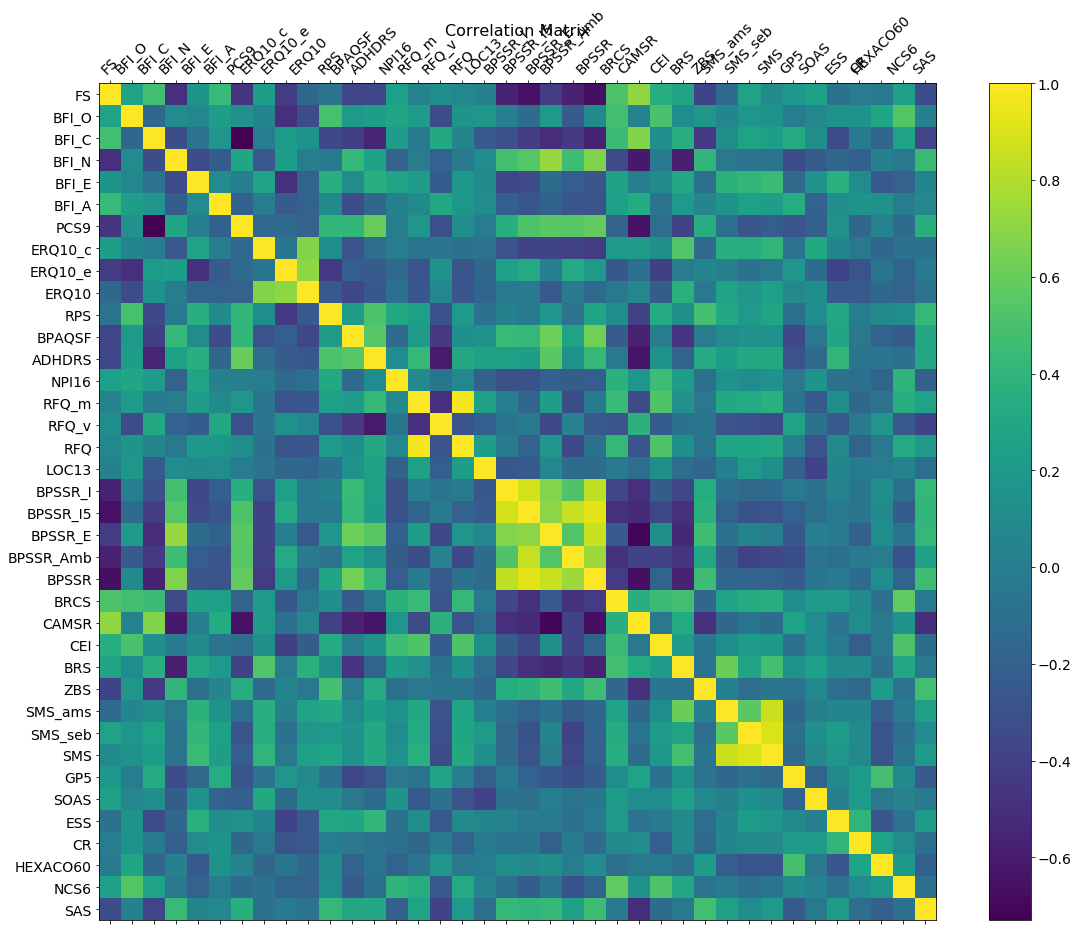

In [9]:
import matplotlib.pyplot as plt

# self correlation plot
f = plt.figure(figsize=(19, 15))
plt.matshow(self_corr, fignum=f.number)
plt.xticks(range(self.shape[1]), self.columns, fontsize=14, rotation=45)
plt.yticks(range(self.shape[1]), self.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [10]:
#import seaborn as sns

#sns.heatmap(self_corr)

In [11]:
others_corr = others.corr()
others_corr.to_csv('others_corr.csv')

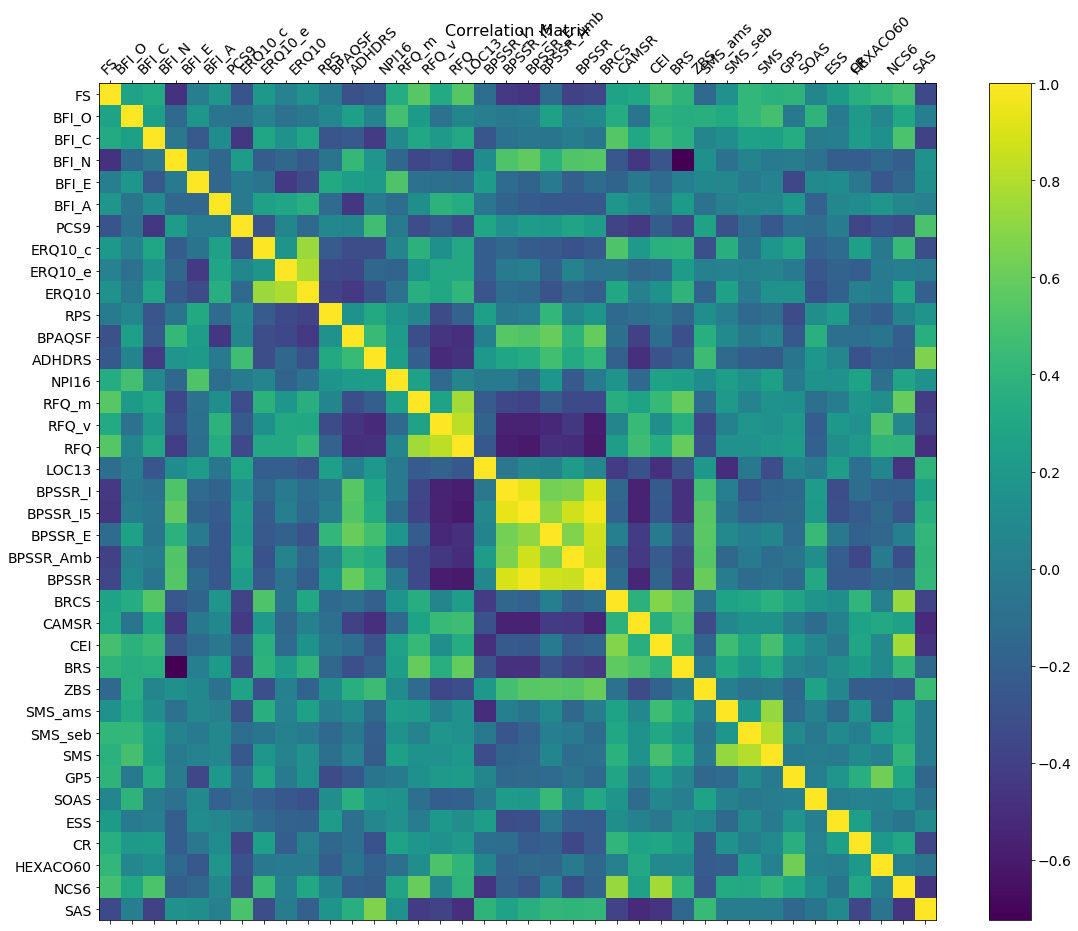

In [12]:
# others correlation plot
f = plt.figure(figsize=(19, 15))
plt.matshow(others_corr, fignum=f.number)
plt.xticks(range(self.shape[1]), self.columns, fontsize=14, rotation=45)
plt.yticks(range(self.shape[1]), self.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#### Comparison b/w Correlation Coefficients

In [13]:
# step 1: fisher's z-transformation
# converted_array = self_corr.index.values
    
# for row in self_corr.itertuples(index=False):
#     converted_row = np.arctanh(row)
#     for index, a in enumerate(converted_row):  # convert infinite number to 0 (inf can't go in dataframe)
#         if a == np.inf:
#             converted_row[index] = 0
#     converted_array = np.vstack((converted_array, converted_row))

# converted_array

In [14]:
# converted_array.shape

In [15]:
# self_corr_z = pd.DataFrame(data=converted_array[1:,:],    # values
#              index=converted_array[0,:],    # 1st row as index
#              columns=converted_array[0,:])  # 1st row as column names
# self_corr_z.head()

In [16]:
# imported module for Statistical Significance Tests on Correlation Coefficients
# modified from original source: https://github.com/psinger/CorrelationStats/blob/master/corrstats.py
"""
Functions for calculating the statistical significant differences between two dependent or independent correlation
coefficients.
The Fisher and Steiger method is adopted from the R package http://personality-project.org/r/html/paired.r.html
and is described in detail in the book 'Statistical Methods for Psychology'
The Zou method is adopted from http://seriousstats.wordpress.com/2012/02/05/comparing-correlations/
Credit goes to the authors of above mentioned packages!
Author: Philipp Singer (www.philippsinger.info)
"""

from __future__ import division

__author__ = 'psinger'

import numpy as np
from scipy.stats import t, norm
from math import atanh, pow
from numpy import tanh

def rz_ci(r, n, conf_level = 0.95):
    zr_se = pow(1/(n - 3), .5)
    moe = norm.ppf(1 - (1 - conf_level)/float(2)) * zr_se
    zu = atanh(r) + moe
    zl = atanh(r) - moe
    return tanh((zl, zu))

def rho_rxy_rxz(rxy, rxz, ryz):
    num = (ryz-1/2.*rxy*rxz)*(1-pow(rxy,2)-pow(rxz,2)-pow(ryz,2))+pow(ryz,3)
    den = (1 - pow(rxy,2)) * (1 - pow(rxz,2))
    return num/float(den)

def independent_corr(xy, ab, n, n2 = None, twotailed=True, conf_level=0.95, method='fisher'):
    """
    Calculates the statistic significance between two independent correlation coefficients
    @param xy: correlation coefficient between x and y
    @param xz: correlation coefficient between a and b
    @param n: number of elements in xy
    @param n2: number of elements in ab (if distinct from n)
    @param twotailed: whether to calculate a one or two tailed test, only works for 'fisher' method
    @param conf_level: confidence level, only works for 'zou' method
    @param method: defines the method uses, 'fisher' or 'zou'
    @return: z and p-val
    """

    if method == 'fisher':
        xy_z = 0.5 * np.log((1 + xy)/(1 - xy))
        ab_z = 0.5 * np.log((1 + ab)/(1 - ab))
        if n2 is None:
            n2 = n

        se_diff_r = np.sqrt(1/(n - 3) + 1/(n2 - 3))
        diff = xy_z - ab_z
        z = abs(diff / se_diff_r)
        p = (1 - norm.cdf(z))
        if twotailed:
            p *= 2

        return z, p
    elif method == 'zou':
        L1 = rz_ci(xy, n, conf_level=conf_level)[0]
        U1 = rz_ci(xy, n, conf_level=conf_level)[1]
        L2 = rz_ci(ab, n2, conf_level=conf_level)[0]
        U2 = rz_ci(ab, n2, conf_level=conf_level)[1]
        lower = xy - ab - pow((pow((xy - L1), 2) + pow((U2 - ab), 2)), 0.5)
        upper = xy - ab + pow((pow((U1 - xy), 2) + pow((ab - L2), 2)), 0.5)
        return lower, upper
    else:
        raise Exception('Wrong method!')
print(independent_corr(0.5 , 0.6, 103, 103, method='fisher'))

(1.0171097212822693, 0.3091012362386931)


In [17]:
# z values into dataframe
z_values = self_corr.index.values
for row in range(0, 38):
    this_row = []
    for index in self_corr.index.values:
        this_row.append(
                        round(
                              independent_corr(self_corr.iloc[row][index], others_corr.iloc[row][index], 42, 48, method='fisher')[0],
                              3
                              )
                       )
    z_values = np.vstack((z_values, np.array(this_row)))
z_values

/Users/yuri/.pyenv/versions/3.6.8/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in double_scalars
/Users/yuri/.pyenv/versions/3.6.8/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
/Users/yuri/.pyenv/versions/3.6.8/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars


array([['FS', 'BFI_O', 'BFI_C', ..., 'HEXACO60', 'NCS6', 'SAS'],
       [nan, 0.001, 0.84, ..., 2.096, 1.18, 0.121],
       [0.001, nan, 1.849, ..., 1.049, 1.274, 0.004],
       ...,
       [2.096, 1.049, 1.335, ..., nan, 0.811, 0.649],
       [1.18, 1.274, 1.28, ..., 0.811, nan, 1.803],
       [0.121, 0.004, 0.099, ..., 0.649, 1.803, nan]], dtype=object)

In [18]:
z_values.shape

(39, 38)

In [19]:
z_values_df = pd.DataFrame(data=z_values[1:,:],    # values
             index=z_values[0,:],    # 1st row as index
             columns=z_values[0,:])  # 1st row as column names
z_values_df.head()

,FS,BFI_O,BFI_C,BFI_N,BFI_E,BFI_A,PCS9,ERQ10_c,ERQ10_e,ERQ10,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
FS,NaN,0.001,0.84,0.141,0.685,1.379,0.977,0.169,2.223,1.362,...,1.253,0.75,1.364,1.018,0.907,1.391,1.722,2.096,1.18,0.121
BFI_O,0.001,NaN,1.849,1.096,0.468,1.388,1.007,0.065,2.114,1.431,...,1.26,1.166,1.762,0.112,1.622,0.805,0.26,1.049,1.274,0.004
BFI_C,0.84,1.849,NaN,1.298,0.797,0.269,2.064,1.34,0.239,0.626,...,0.003,0.061,0.122,0.052,0.559,1.658,1.156,1.335,1.28,0.099
BFI_N,0.141,1.096,1.298,NaN,1.451,0.319,0.278,0.177,1.799,1.089,...,0.173,0.518,0.217,1.461,0.65,0.207,0.029,0.773,0.767,1.395
BFI_E,0.685,0.468,0.797,1.451,NaN,1.178,0.145,1.518,0.341,0.771,...,1.509,2.048,2.055,1.099,0.295,1.223,0.653,0.061,0.138,0.396


In [20]:
# p values into dataframe
p_values = self_corr.index.values
for row in range(0, 38):
    this_row = []
    for index in self_corr.index.values:
        this_row.append(
                        round(
                              independent_corr(self_corr.iloc[row][index], others_corr.iloc[row][index], 42, 48, method='fisher')[1],
                              3
                              )
                       )
    p_values = np.vstack((p_values, np.array(this_row)))
p_values

/Users/yuri/.pyenv/versions/3.6.8/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in double_scalars
/Users/yuri/.pyenv/versions/3.6.8/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
/Users/yuri/.pyenv/versions/3.6.8/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars


array([['FS', 'BFI_O', 'BFI_C', ..., 'HEXACO60', 'NCS6', 'SAS'],
       [nan, 0.999, 0.401, ..., 0.036, 0.238, 0.904],
       [0.999, nan, 0.064, ..., 0.294, 0.203, 0.997],
       ...,
       [0.036, 0.294, 0.182, ..., nan, 0.417, 0.517],
       [0.238, 0.203, 0.201, ..., 0.417, nan, 0.071],
       [0.904, 0.997, 0.921, ..., 0.517, 0.071, nan]], dtype=object)

In [21]:
p_values_df = pd.DataFrame(data=p_values[1:,:],    # values
             index=p_values[0,:],    # 1st row as index
             columns=p_values[0,:])  # 1st row as column names
p_values_df.head()

,FS,BFI_O,BFI_C,BFI_N,BFI_E,BFI_A,PCS9,ERQ10_c,ERQ10_e,ERQ10,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
FS,NaN,0.999,0.401,0.888,0.493,0.168,0.328,0.866,0.026,0.173,...,0.21,0.453,0.173,0.309,0.364,0.164,0.085,0.036,0.238,0.904
BFI_O,0.999,NaN,0.064,0.273,0.639,0.165,0.314,0.949,0.035,0.152,...,0.208,0.244,0.078,0.911,0.105,0.421,0.795,0.294,0.203,0.997
BFI_C,0.401,0.064,NaN,0.194,0.425,0.788,0.039,0.18,0.811,0.531,...,0.998,0.951,0.903,0.959,0.576,0.097,0.248,0.182,0.201,0.921
BFI_N,0.888,0.273,0.194,NaN,0.147,0.749,0.781,0.859,0.072,0.276,...,0.863,0.604,0.828,0.144,0.516,0.836,0.977,0.439,0.443,0.163
BFI_E,0.493,0.639,0.425,0.147,NaN,0.239,0.885,0.129,0.733,0.441,...,0.131,0.041,0.04,0.272,0.768,0.221,0.514,0.952,0.89,0.692


In [22]:
# save in array those of which p-value <= 0.05
significant = []
all_ = []
for row in range(0, 38):
    i = 0
    for index in self_corr.index.values:
        if row > i:
            p_value = p_values_df.iloc[row][index]
            all_.append([self_corr.index.values[row], index, p_value])
            if p_value <= 0.05:
                significant.append([self_corr.index.values[row], index, p_value])
        i += 1
# significant

In [23]:
p_values_df = pd.DataFrame(data=np.array(all_),
             index=np.array(range(1,len(all_)+1)),
             columns=np.array(['scale1', 'scale2', 'p value']))
p_values_df.head()

,scale1,scale2,p value
1,BFI_O,FS,0.999
2,BFI_C,FS,0.401
3,BFI_C,BFI_O,0.064
4,BFI_N,FS,0.888
5,BFI_N,BFI_O,0.273


In [24]:
p_values_sig_df = pd.DataFrame(data=np.array(significant),
             index=np.array(range(1,len(significant)+1)),
             columns=np.array(['scale1', 'scale2', 'p value']))
p_values_sig_df

,scale1,scale2,p value
1,PCS9,BFI_C,0.039
2,ERQ10_e,FS,0.026
3,ERQ10_e,BFI_O,0.035
4,ERQ10_e,BFI_A,0.015
5,ERQ10,BFI_A,0.011
...,...,...,...
72,NCS6,SMS,0.027
73,SAS,ADHDRS,0.027
74,SAS,RFQ_m,0.001
75,SAS,RFQ,0.001


In [25]:
p_values_df.to_csv('self_others_coef_comparison.csv')

In [26]:
p_values_sig_df.to_csv('self_others_coef_comparison_sig.csv')

## 2. Comparison b/w self & others
- nan dropped
- self - others t-test p-values: saved in self_others_ttest.csv, self_others_ttest_sig.csv (only significant ones)

In [27]:
self = df.loc[df_scores['SurveyType'] == 1]
others = df.loc[df_scores['SurveyType'] == 2]

In [28]:
others.head()

,ResponseId,TargetId,Complete,ID,SurveyType,Relationship,Age,Gender,Religion,guess_1,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
1,2,2,True,aeri,2,1.0,3.0,M,7.0,28.0,...,22.0,17.0,39.0,15.0,60.0,18.0,11.0,27.0,18.0,37.0
2,3,2,True,aeri,2,1.0,3.0,M,7.0,31.0,...,21.0,22.0,43.0,19.0,48.0,15.0,17.0,29.0,25.0,22.0
4,5,2,True,aeri,2,1.0,2.0,F,7.0,40.0,...,20.0,18.0,38.0,18.0,49.0,20.0,19.0,34.0,19.0,34.0
7,8,4,True,CKR,2,1.0,4.0,M,7.0,NaN,...,18.0,16.0,34.0,24.0,51.0,14.0,17.0,40.0,23.0,41.0
11,12,8,True,Journey Yoon,2,2.0,2.0,M,7.0,6.0,...,24.0,14.0,38.0,25.0,50.0,9.0,28.0,30.0,28.0,19.0


In [29]:
others_df = others.drop(['guess_1', 'guess_2', 'guess_3', 'Relationship', 
                         'ResponseId', 'Complete', 'ID', 'Age', 'Gender', 'Religion', 'SurveyType'], axis=1)
others_df.head()

,TargetId,FS,BFI_O,BFI_C,BFI_N,BFI_E,BFI_A,PCS9,ERQ10_c,ERQ10_e,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
1,2,40.0,12.0,12.0,8.0,11.0,9.0,27.0,23.0,8.0,...,22.0,17.0,39.0,15.0,60.0,18.0,11.0,27.0,18.0,37.0
2,2,50.0,12.0,15.0,4.0,10.0,11.0,19.0,34.0,21.0,...,21.0,22.0,43.0,19.0,48.0,15.0,17.0,29.0,25.0,22.0
4,2,48.0,10.0,12.0,7.0,10.0,12.0,33.0,25.0,17.0,...,20.0,18.0,38.0,18.0,49.0,20.0,19.0,34.0,19.0,34.0
7,4,42.0,13.0,11.0,9.0,8.0,13.0,33.0,31.0,13.0,...,18.0,16.0,34.0,24.0,51.0,14.0,17.0,40.0,23.0,41.0
11,8,44.0,11.0,15.0,10.0,5.0,11.0,24.0,41.0,19.0,...,24.0,14.0,38.0,25.0,50.0,9.0,28.0,30.0,28.0,19.0


In [30]:
others_df = others_df.sort_values(by='TargetId')

In [31]:
# get mean of others for each target (since there can be 2 ppl who did survey for same person)
# first, get row numbers that have same target id
target_id = -1  # current target id
single_rows = []
multiple_rows = []
current_rows = []
for index, row in others_df.iterrows():
    if row['TargetId'] == target_id:
        current_rows.append(index)
    else:
        target_id = row['TargetId']
        if len(current_rows) > 1:
            multiple_rows.append(current_rows)
        current_rows = [index]
if len(current_rows) > 1:
    multiple_rows.append(current_rows)

print(multiple_rows)

[[1, 2, 4], [14, 86], [19, 20], [22, 23], [25, 27], [28, 29], [31, 88], [33, 81], [35, 36, 37, 87, 52], [41, 43], [49, 51], [57, 58], [64, 65], [89, 70], [73, 72], [75, 77, 76]]


In [32]:
# then, get means
means_array = others_df.columns.values
for rows in multiple_rows:
    means_array = np.vstack((means_array, others_df.loc[rows].mean()))
# means_array

In [33]:
# make a dataframe
means_df = pd.DataFrame(data=means_array[1:,:],    # values
             index=range(1,len(means_array)),    # 1st row as index
             columns=means_array[0,:])  # 1st row as column names
means_df.head()

,TargetId,FS,BFI_O,BFI_C,BFI_N,BFI_E,BFI_A,PCS9,ERQ10_c,ERQ10_e,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
1,2,46,11.3333,13,6.33333,10.3333,10.6667,26.3333,27.3333,15.3333,...,21,19,40,17.3333,52.3333,17.6667,15.6667,30,20.6667,31
2,10,40,8.5,11.5,11.5,7.5,13,29,31.5,17.5,...,19.5,20.5,40,18,46,6.5,13,30,20,33.5
3,13,42,8,9,9,13.5,13,27,27,12,...,14,14,28,18.5,48.5,18.5,13.5,31,13.5,42
4,15,52.5,9,11,4,8.5,12.5,22,31,19,...,21,16,37,23,47,15,15,38,19.5,40
5,17,44,7.5,11,6,6,12,37.5,26.5,18,...,15,13,28,20,52.5,17,13,34,19.5,34.5


In [34]:
# get target id's that have only one row
single_rows = []
for index, row in others_df.iterrows():
    exists = False
    for a in multiple_rows:
        if index in a:
            exists = True
    if not exists:
        single_rows.append(index)
    
single_rows

[7, 11, 16, 32, 46, 47, 54, 84, 68, 80, 83]

In [35]:
singles_array = others_df.columns.values
for row in single_rows:
    singles_array = np.vstack((singles_array, others_df.loc[row]))
# singles_array

In [36]:
singles_df = pd.DataFrame(data=singles_array[1:,:],    # values
             index=range(1,len(singles_array)),    # 1st row as index
             columns=singles_array[0,:])  # 1st row as column names
singles_df.head()

,TargetId,FS,BFI_O,BFI_C,BFI_N,BFI_E,BFI_A,PCS9,ERQ10_c,ERQ10_e,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
1,4,42,13,11,9,8,13,33,31,13,...,18,16,34,24,51,14,17,40,23,41
2,8,44,11,15,10,5,11,24,41,19,...,24,14,38,25,50,9,28,30,28,19
3,11,45,14,12,11,11,10,30,27,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,46,8,7,6,12,11,28,34,16,...,23,23,46,23,54,17,10,37,19,41
5,27,50,15,15,7,10,14,12,26,14,...,22,21,43,17,62,13,15,35,21,21


In [37]:
# concatenate
frames = [singles_df, means_df]
others_whole = pd.concat(frames)
others_whole = others_whole.sort_values(by='TargetId').reset_index(drop=True)
others_whole.head()

,TargetId,FS,BFI_O,BFI_C,BFI_N,BFI_E,BFI_A,PCS9,ERQ10_c,ERQ10_e,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
0,2,46,11.3333,13,6.33333,10.3333,10.6667,26.3333,27.3333,15.3333,...,21,19,40,17.3333,52.3333,17.6667,15.6667,30,20.6667,31
1,4,42,13,11,9,8,13,33,31,13,...,18,16,34,24,51,14,17,40,23,41
2,8,44,11,15,10,5,11,24,41,19,...,24,14,38,25,50,9,28,30,28,19
3,10,40,8.5,11.5,11.5,7.5,13,29,31.5,17.5,...,19.5,20.5,40,18,46,6.5,13,30,20,33.5
4,11,45,14,12,11,11,10,30,27,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# start comparing with self
self_df = self.drop(['guess_1', 'guess_2', 'guess_3', 'Relationship', 
                         'ResponseId', 'Complete', 'ID', 'Age', 'Gender', 'Religion', 'SurveyType'], axis=1)
self_df.head()

,TargetId,FS,BFI_O,BFI_C,BFI_N,BFI_E,BFI_A,PCS9,ERQ10_c,ERQ10_e,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
0,1,51.0,7.0,12.0,9.0,12.0,11.0,21.0,28.0,12.0,...,22.0,21.0,43.0,19.0,55.0,12.0,21.0,28.0,22.0,41.0
3,2,42.0,6.0,10.0,6.0,10.0,9.0,33.0,28.0,20.0,...,18.0,12.0,30.0,20.0,48.0,14.0,10.0,25.0,22.0,35.0
5,3,28.0,9.0,5.0,13.0,3.0,7.0,45.0,25.0,20.0,...,14.0,5.0,19.0,23.0,51.0,5.0,10.0,48.0,24.0,42.0
6,4,47.0,14.0,10.0,9.0,8.0,12.0,37.0,22.0,14.0,...,20.0,19.0,39.0,21.0,55.0,15.0,29.0,38.0,28.0,43.0
8,5,47.0,13.0,12.0,8.0,6.0,10.0,39.0,19.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1) drop nan

In [39]:
others_valid = others_whole.dropna()
self_valid = self_df.dropna()
others_valid.shape

(22, 39)

In [107]:
# select only rows that have target id in others_valid (so that we can compare)
ids = []
for index, rows in others_valid.iterrows():
    ids.append(rows['TargetId'])
    
rows_to_save = []
for index, rows in self_valid.iterrows():
    if rows['TargetId'] in ids:
        rows_to_save.append(index)

self_comp = self_valid.loc[rows_to_save].sort_values(by='TargetId')
self_comp.head()

,TargetId,FS,BFI_O,BFI_C,BFI_N,BFI_E,BFI_A,PCS9,ERQ10_c,ERQ10_e,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
3,2,42.0,6.0,10.0,6.0,10.0,9.0,33.0,28.0,20.0,...,18.0,12.0,30.0,20.0,48.0,14.0,10.0,25.0,22.0,35.0
6,4,47.0,14.0,10.0,9.0,8.0,12.0,37.0,22.0,14.0,...,20.0,19.0,39.0,21.0,55.0,15.0,29.0,38.0,28.0,43.0
12,8,26.0,10.0,6.0,12.0,10.0,9.0,41.0,21.0,16.0,...,19.0,20.0,39.0,18.0,48.0,21.0,38.0,38.0,20.0,30.0
44,10,44.0,7.0,10.0,12.0,7.0,11.0,33.0,29.0,21.0,...,20.0,22.0,42.0,23.0,48.0,12.0,16.0,32.0,16.0,39.0
18,13,47.0,8.0,9.0,9.0,15.0,13.0,34.0,32.0,10.0,...,18.0,23.0,41.0,21.0,51.0,16.0,15.0,31.0,11.0,44.0


In [108]:
# select only rows that have target id in self_comp (so that we can compare)
ids = []
for index, rows in self_comp.iterrows():
    ids.append(rows['TargetId'])
    
rows_to_save = []
for index, rows in others_valid.iterrows():
    if rows['TargetId'] in ids:
        rows_to_save.append(index)

others_comp = others_valid.loc[rows_to_save].sort_values(by='TargetId')
others_comp.head()

,TargetId,FS,BFI_O,BFI_C,BFI_N,BFI_E,BFI_A,PCS9,ERQ10_c,ERQ10_e,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
0,2,46,11.3333,13,6.33333,10.3333,10.6667,26.3333,27.3333,15.3333,...,21,19,40,17.3333,52.3333,17.6667,15.6667,30,20.6667,31
1,4,42,13,11,9,8,13,33,31,13,...,18,16,34,24,51,14,17,40,23,41
2,8,44,11,15,10,5,11,24,41,19,...,24,14,38,25,50,9,28,30,28,19
3,10,40,8.5,11.5,11.5,7.5,13,29,31.5,17.5,...,19.5,20.5,40,18,46,6.5,13,30,20,33.5
5,13,42,8,9,9,13.5,13,27,27,12,...,14,14,28,18.5,48.5,18.5,13.5,31,13.5,42


In [109]:
self_comp.shape

(20, 39)

In [110]:
others_comp.shape   ## data only 20,,,,,,, 8o8

(20, 39)

In [111]:
self_comp.columns.values

array(['TargetId', 'FS', 'BFI_O', 'BFI_C', 'BFI_N', 'BFI_E', 'BFI_A',
       'PCS9', 'ERQ10_c', 'ERQ10_e', 'ERQ10', 'RPS', 'BPAQSF', 'ADHDRS',
       'NPI16', 'RFQ_m', 'RFQ_v', 'RFQ', 'LOC13', 'BPSSR_I', 'BPSSR_I5',
       'BPSSR_E', 'BPSSR_Amb', 'BPSSR', 'BRCS', 'CAMSR', 'CEI', 'BRS',
       'ZBS', 'SMS_ams', 'SMS_seb', 'SMS', 'GP5', 'SOAS', 'ESS', 'CR',
       'HEXACO60', 'NCS6', 'SAS'], dtype=object)

In [112]:
from scipy import stats
results = []
for a in self_comp.columns.values:
    results.append(stats.ttest_rel(self_comp[a], others_comp[a]))  # paired t-test
results

[Ttest_relResult(statistic=nan, pvalue=nan),
 Ttest_relResult(statistic=-1.538126028896504, pvalue=0.14050554351090266),
 Ttest_relResult(statistic=-1.3142483681165695, pvalue=0.20440874789192864),
 Ttest_relResult(statistic=-3.4211057948496433, pvalue=0.0028643567073246656),
 Ttest_relResult(statistic=2.533221374326082, pvalue=0.020266978998896668),
 Ttest_relResult(statistic=-1.1799624196187473, pvalue=0.25257837024036406),
 Ttest_relResult(statistic=-2.0224594116873678, pvalue=0.0574351316463671),
 Ttest_relResult(statistic=2.88283592439033, pvalue=0.00953122101710936),
 Ttest_relResult(statistic=-1.0807934700667081, pvalue=0.29331725715646517),
 Ttest_relResult(statistic=0.04671457711971556, pvalue=0.9632282352728735),
 Ttest_relResult(statistic=-0.8132153535783511, pvalue=0.42616830528348215),
 Ttest_relResult(statistic=1.5744265225291374, pvalue=0.13189341243806282),
 Ttest_relResult(statistic=1.261799279034185, pvalue=0.22229194249230805),
 Ttest_relResult(statistic=2.2858364250

In [113]:
p_values = []
for a in results:
    p_values.append(round(a[1], 3))

In [114]:
p_values_df = pd.DataFrame(data=p_values[1:],   
             index=self_comp.columns.values[1:],
             columns=['p-value']) 
p_values_df.head()

,p-value
FS,0.141
BFI_O,0.204
BFI_C,0.003
BFI_N,0.020
BFI_E,0.253


In [115]:
p_values_df.to_csv('self_others_ttest.csv')

In [116]:
# get only significant ones
significant = []
for index, row in p_values_df.iterrows():
    if row['p-value'] <= 0.05:
        significant.append(index)

p_values_df_sig = p_values_df.loc[significant]
p_values_df_sig

,p-value
BFI_C,0.003
BFI_N,0.020
PCS9,0.010
ADHDRS,0.034
SAS,0.006


In [117]:
p_values_df_sig.to_csv('self_others_ttest_sig.csv')

## 3. Inter rater reliability

#### ICC

In [81]:
# modified from source: https://stackoverflow.com/questions/40965579/intraclass-correlation-in-python-module
# from rpy2.robjects import DataFrame, FloatVector, IntVector
# from rpy2.robjects.packages import importr
# from math import isclose

# # concatenate self & others
# self_comp.assign(is_self=1)
# others_comp.assign(is_self=0)

# frame = [self_comp, others_comp]
# whole_df = pd.concat(frame)
# # groups = [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4,
# #           4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8]
# # values = [1, 2, 0, 1, 1, 3, 3, 2, 3, 8, 1, 4, 6, 4, 3,
# #           3, 6, 5, 5, 6, 7, 5, 6, 2, 8, 7, 7, 9, 9, 9, 9, 8]

# r_icc = importr("ICC")
# # df = DataFrame({"groups": IntVector(groups),
# #                 "values": FloatVector(values)})
# # icc_res = r_icc.ICCbare('is_self', 'FS', data=whole_df)
# from rpy2.robjects import default_converter, pandas2ri
# from rpy2.robjects.conversion import Converter, localconverter
# with localconverter(default_converter + pandas2ri.converter) as cv:
#     c = pandas2ri.py2ri(whole_df)
    
# # icc_val = icc_res[0] # icc_val now holds the icc value

# # # check whether icc value equals reference value
# # print(isclose(icc_val, 0.728, abs_tol=0.001))

In [152]:
# 1: me vs. others(mean)
import pingouin as pg

# concatenate self & others
self_comp = self_comp.assign(is_self=1)
others_comp = others_comp.assign(is_self=0)
frame = [self_comp, others_comp]
whole_df = pd.concat(frame)


## int 로 버림함.....?!? << 문제 있을 수도
values = []
for a in self_comp.columns.values:
    if a != 'TargetId' and a != 'is_self':
        values.append(
                    round(
                        pg.intraclass_corr(
                            data=whole_df.astype('int32'), 
                            targets='TargetId', raters='is_self', ratings=a
                        ).iloc[1]['ICC']
                        , 3
                    )
        )

values

[0.13,
 0.342,
 0.255,
 0.738,
 0.589,
 0.283,
 0.574,
 0.083,
 0.605,
 0.442,
 0.519,
 0.273,
 0.181,
 0.179,
 0.031,
 0.588,
 -0.064,
 0.08,
 0.451,
 0.504,
 0.384,
 0.384,
 0.594,
 0.474,
 0.421,
 0.379,
 0.844,
 0.147,
 0.515,
 0.284,
 0.45,
 0.065,
 0.088,
 0.355,
 0.75,
 0.28,
 0.395,
 0.518]

In [153]:
ICC_df = pd.DataFrame(data=values[1:],   
             index=self_comp.columns.values[1:-2],
             columns=['ICC'])
ICC_df

,ICC
FS,0.342
BFI_O,0.255
BFI_C,0.738
BFI_N,0.589
BFI_E,0.283
BFI_A,0.574
PCS9,0.083
ERQ10_c,0.605
ERQ10_e,0.442
ERQ10,0.519


In [156]:
poor = []  # poor reliability b/w self & others
moderate = []
good = []
excellent = []
for index, row in ICC_df.iterrows():
    if row['ICC'] < 0.5:
        poor.append(index)
        
for index, row in ICC_df.iterrows():
    if row['ICC'] >= 0.5 and row['ICC'] < 0.75:
        moderate.append(index)
        
for index, row in ICC_df.iterrows():
    if row['ICC'] >= 0.75 and row['ICC'] < 0.9:
        good.append(index)
        
for index, row in ICC_df.iterrows():
    if row['ICC'] >= 0.9:
        excellent.append(index)
        
ICC_poor = ICC_df.loc[poor]
ICC_moderate = ICC_df.loc[moderate]
ICC_good = ICC_df.loc[good]
ICC_excellent = ICC_df.loc[excellent]

ICC_poor

,ICC
FS,0.342
BFI_O,0.255
BFI_E,0.283
PCS9,0.083
ERQ10_e,0.442
RPS,0.273
BPAQSF,0.181
ADHDRS,0.179
NPI16,0.031
RFQ_v,-0.064


In [157]:
ICC_moderate

,ICC
BFI_C,0.738
BFI_N,0.589
BFI_A,0.574
ERQ10_c,0.605
ERQ10,0.519
RFQ_m,0.588
BPSSR_I,0.504
BPSSR_Amb,0.594
ZBS,0.515
NCS6,0.518


In [158]:
ICC_good

,ICC
CEI,0.844
ESS,0.750


In [159]:
ICC_excellent

,ICC


In [163]:
ICC_poor = ICC_poor.assign(ICC_level='poor')

In [164]:
ICC_moderate = ICC_poor.assign(ICC_level='moderate')

In [165]:
ICC_good = ICC_poor.assign(ICC_level='good')

In [166]:
ICC_excellent = ICC_poor.assign(ICC_level='excellent')

In [168]:
frames = [ICC_poor, ICC_moderate, ICC_good, ICC_excellent]

In [170]:
ICC_lvl_df = pd.concat(frames)
ICC_lvl_df

,ICC,ICC_level
FS,0.342,poor
BFI_O,0.255,poor
BFI_E,0.283,poor
PCS9,0.083,poor
ERQ10_e,0.442,poor
...,...,...
SMS,0.065,excellent
GP5,0.088,excellent
SOAS,0.355,excellent
CR,0.280,excellent


In [171]:
ICC_lvl_df.to_csv('ICC.csv')

In [172]:
# # 2: self vs. various others (other1, other2, ...)  --> x works for different # of raters for each person
# others.head()

,ResponseId,TargetId,Complete,ID,SurveyType,Relationship,Age,Gender,Religion,guess_1,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
1,2,2,True,aeri,2,1.0,3.0,M,7.0,28.0,...,22.0,17.0,39.0,15.0,60.0,18.0,11.0,27.0,18.0,37.0
2,3,2,True,aeri,2,1.0,3.0,M,7.0,31.0,...,21.0,22.0,43.0,19.0,48.0,15.0,17.0,29.0,25.0,22.0
4,5,2,True,aeri,2,1.0,2.0,F,7.0,40.0,...,20.0,18.0,38.0,18.0,49.0,20.0,19.0,34.0,19.0,34.0
7,8,4,True,CKR,2,1.0,4.0,M,7.0,NaN,...,18.0,16.0,34.0,24.0,51.0,14.0,17.0,40.0,23.0,41.0
11,12,8,True,Journey Yoon,2,2.0,2.0,M,7.0,6.0,...,24.0,14.0,38.0,25.0,50.0,9.0,28.0,30.0,28.0,19.0


In [173]:
# others_multiple = others.drop(['guess_1', 'guess_2', 'guess_3', 'Relationship', 
#                          'Complete', 'ID', 'Age', 'Gender', 'Religion', 'SurveyType'], axis=1)
# others_multiple.head()

,ResponseId,TargetId,FS,BFI_O,BFI_C,BFI_N,BFI_E,BFI_A,PCS9,ERQ10_c,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
1,2,2,40.0,12.0,12.0,8.0,11.0,9.0,27.0,23.0,...,22.0,17.0,39.0,15.0,60.0,18.0,11.0,27.0,18.0,37.0
2,3,2,50.0,12.0,15.0,4.0,10.0,11.0,19.0,34.0,...,21.0,22.0,43.0,19.0,48.0,15.0,17.0,29.0,25.0,22.0
4,5,2,48.0,10.0,12.0,7.0,10.0,12.0,33.0,25.0,...,20.0,18.0,38.0,18.0,49.0,20.0,19.0,34.0,19.0,34.0
7,8,4,42.0,13.0,11.0,9.0,8.0,13.0,33.0,31.0,...,18.0,16.0,34.0,24.0,51.0,14.0,17.0,40.0,23.0,41.0
11,12,8,44.0,11.0,15.0,10.0,5.0,11.0,24.0,41.0,...,24.0,14.0,38.0,25.0,50.0,9.0,28.0,30.0,28.0,19.0


In [174]:
# others_multiple = others_multiple.sort_values(by='TargetId')

In [178]:
# # select only rows that have target id in self_comp (so that we can compare)
# ids = []
# for index, rows in self_comp.iterrows():
#     ids.append(rows['TargetId'])
    
# rows_to_save = []
# for index, rows in others_multiple.iterrows():
#     if rows['TargetId'] in ids:
#         rows_to_save.append(index)

# others_mul_comp = others_multiple.loc[rows_to_save].sort_values(by='TargetId')
# others_mul_comp.head()

,ResponseId,TargetId,FS,BFI_O,BFI_C,BFI_N,BFI_E,BFI_A,PCS9,ERQ10_c,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
1,2,2,40.0,12.0,12.0,8.0,11.0,9.0,27.0,23.0,...,22.0,17.0,39.0,15.0,60.0,18.0,11.0,27.0,18.0,37.0
2,3,2,50.0,12.0,15.0,4.0,10.0,11.0,19.0,34.0,...,21.0,22.0,43.0,19.0,48.0,15.0,17.0,29.0,25.0,22.0
4,5,2,48.0,10.0,12.0,7.0,10.0,12.0,33.0,25.0,...,20.0,18.0,38.0,18.0,49.0,20.0,19.0,34.0,19.0,34.0
7,8,4,42.0,13.0,11.0,9.0,8.0,13.0,33.0,31.0,...,18.0,16.0,34.0,24.0,51.0,14.0,17.0,40.0,23.0,41.0
11,12,8,44.0,11.0,15.0,10.0,5.0,11.0,24.0,41.0,...,24.0,14.0,38.0,25.0,50.0,9.0,28.0,30.0,28.0,19.0


In [182]:
# # get ResponseId of self
# self_multiple = self.drop(['guess_1', 'guess_2', 'guess_3', 'Relationship', 
#                          'Complete', 'ID', 'Age', 'Gender', 'Religion', 'SurveyType'], axis=1)
# self_multiple.head()

,ResponseId,TargetId,FS,BFI_O,BFI_C,BFI_N,BFI_E,BFI_A,PCS9,ERQ10_c,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
0,1,1,51.0,7.0,12.0,9.0,12.0,11.0,21.0,28.0,...,22.0,21.0,43.0,19.0,55.0,12.0,21.0,28.0,22.0,41.0
3,4,2,42.0,6.0,10.0,6.0,10.0,9.0,33.0,28.0,...,18.0,12.0,30.0,20.0,48.0,14.0,10.0,25.0,22.0,35.0
5,6,3,28.0,9.0,5.0,13.0,3.0,7.0,45.0,25.0,...,14.0,5.0,19.0,23.0,51.0,5.0,10.0,48.0,24.0,42.0
6,7,4,47.0,14.0,10.0,9.0,8.0,12.0,37.0,22.0,...,20.0,19.0,39.0,21.0,55.0,15.0,29.0,38.0,28.0,43.0
8,9,5,47.0,13.0,12.0,8.0,6.0,10.0,39.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
# # drop nan
# others_mul_valid = others_mul_comp.dropna()
# self_mul_valid = self_multiple.dropna()

# # concatenate self & others
# frame = [self_mul_valid, others_mul_valid]
# whole_mul_df = pd.concat(frame)

# pg.intraclass_corr(
#                    data=whole_mul_df.astype('int32'), 
#                    targets='TargetId', raters='ResponseId', ratings='FS'
#                   )

# # --> doesn't work because k (= # of raters) is not same for every person 

ValueError: Either missing values are present in data or data are unbalanced. Please remove them manually or use nan_policy='omit'.

#### Cohen's Kappa

In [209]:
# import sklearn.metrics
# ### cohen -> categorical variable에 대해서만 가능한 것인 것 같다.....???

# values = []
# for a in self_comp.columns.values:
#     values.append(round(sklearn.metrics.cohen_kappa_score(
#                                     self_comp[a].astype('int32').values.tolist(), 
#                                     others_comp[a].astype('int32').values.tolist()
#                     ), 3)
#                   )

# kappa_df = pd.DataFrame(data=values[1:],   
#              index=self_comp.columns.values[1:],
#              columns=['kappa']) 
# kappa_df.head()

,kappa
FS,-0.030
BFI_O,0.140
BFI_C,0.058
BFI_N,0.106
BFI_E,0.118


In [188]:
# get raw data with result of all items
f = open('pilot_results.csv','r')
data_raw = pd.read_csv(f)

data_raw.set_index('ResponseId')
data_raw.head()

,ResponseId,TargetId,QualtricsId,IPAddress,Latitude,Longitude,StartDate_1,EndDate_1,Duration_1,StartDate_2,...,SAS_10,SAS_11,SAS_12,SAS_13,SAS_14,SAS_15,SAS,guess_1,guess_2,guess_3
0,1,1,R_12unZMHjJEzjU7w,223.38.21.205,37.598495,126.978302,3/17/20 12:32,3/17/20 12:40,511.0,3/17/20 12:40,...,3.0,3.0,3.0,3.0,3.0,3.0,41.0,NaN,NaN,NaN
1,2,2,R_1MPUDZpgLwIxe1A,175.223.22.95,37.598495,126.978302,3/18/20 11:17,3/18/20 11:25,501.0,3/18/20 11:26,...,3.0,3.0,2.0,3.0,2.0,1.0,37.0,28.0,24.0,18.0
2,3,2,R_29nM2ZnVIpXduHk,183.104.122.33,35.268005,128.839813,3/18/20 10:29,3/18/20 10:42,792.0,3/18/20 10:42,...,2.0,1.0,1.0,2.0,2.0,2.0,22.0,31.0,34.0,26.0
3,4,2,R_2BsWkDHnnRpZoQ3,211.109.158.40,37.598495,126.978302,3/17/20 21:46,3/17/20 21:59,782.0,3/17/20 21:59,...,3.0,2.0,3.0,3.0,2.0,3.0,35.0,NaN,NaN,NaN
4,5,2,R_27NBh3oSecWIT6D,211.224.126.112,35.872299,128.592407,3/18/20 10:19,3/18/20 10:35,961.0,3/18/20 10:36,...,3.0,2.0,3.0,2.0,2.0,3.0,34.0,40.0,60.0,30.0


In [189]:
# drop irrelevant information
df_raw = data_raw.drop(['QualtricsId', 'IPAddress', 'Latitude', 'Longitude', 'StartDate_1', 'EndDate_1', 'StartDate_2',
               'EndDate_2', 'StartDate_3', 'EndDate_3', 'Duration_1', 'Duration_2', 'Duration_3', 'DurationTotal'],
               axis=1)
df_raw.set_index('ResponseId')
df_raw.head()

,ResponseId,TargetId,Complete,ID,SurveyType,Relationship,Age,Gender,Religion,FS_1,...,SAS_10,SAS_11,SAS_12,SAS_13,SAS_14,SAS_15,SAS,guess_1,guess_2,guess_3
0,1,1,True,^oo^,1,NaN,5.0,F,7.0,6.0,...,3.0,3.0,3.0,3.0,3.0,3.0,41.0,NaN,NaN,NaN
1,2,2,True,aeri,2,1.0,3.0,M,7.0,5.0,...,3.0,3.0,2.0,3.0,2.0,1.0,37.0,28.0,24.0,18.0
2,3,2,True,aeri,2,1.0,3.0,M,7.0,6.0,...,2.0,1.0,1.0,2.0,2.0,2.0,22.0,31.0,34.0,26.0
3,4,2,True,aeri,1,NaN,2.0,F,3.0,5.0,...,3.0,2.0,3.0,3.0,2.0,3.0,35.0,NaN,NaN,NaN
4,5,2,True,aeri,2,1.0,2.0,F,7.0,6.0,...,3.0,2.0,3.0,2.0,2.0,3.0,34.0,40.0,60.0,30.0


In [224]:
df_raw_1 = df_raw.drop(['ResponseId', 'Complete', 'ID', 'Age', 'Gender', 'Religion'], axis=1)

# only score information
df_raw_scores = df_raw_1.drop(['Relationship', 'guess_1', 'guess_2', 'guess_3'], axis=1)
# separate self & others
self_raw = df_raw_scores.loc[df_scores['SurveyType'] == 1].drop(['SurveyType'], axis=1)
others_raw = df_raw_scores.loc[df_scores['SurveyType'] == 2].drop(['SurveyType'], axis=1).sort_values(by='TargetId')

others_raw.head()

,TargetId,FS_1,FS_2,FS_3,FS_4,FS_5,FS_6,FS_7,FS_8,FS,...,SAS_7,SAS_8,SAS_9,SAS_10,SAS_11,SAS_12,SAS_13,SAS_14,SAS_15,SAS
1,2,5.0,5.0,5.0,5.0,6.0,5.0,4.0,5.0,40.0,...,3.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,1.0,37.0
2,2,6.0,6.0,7.0,5.0,7.0,6.0,6.0,7.0,50.0,...,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,22.0
4,2,6.0,6.0,7.0,6.0,5.0,6.0,6.0,6.0,48.0,...,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,34.0
7,4,7.0,5.0,6.0,5.0,5.0,5.0,4.0,5.0,42.0,...,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,41.0
11,8,6.0,6.0,7.0,4.0,6.0,5.0,4.0,6.0,44.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,19.0


In [225]:
# get mean of others for each target (since there can be 2 ppl who did survey for same person)
# first, get row numbers that have same target id
target_id = -1  # current target id
single_rows = []
multiple_rows = []
current_rows = []
for index, row in others_raw.iterrows():
    if row['TargetId'] == target_id:
        current_rows.append(index)
    else:
        target_id = row['TargetId']
        if len(current_rows) > 1:
            multiple_rows.append(current_rows)
        current_rows = [index]
if len(current_rows) > 1:
    multiple_rows.append(current_rows)

print(multiple_rows)

[[1, 2, 4], [14, 86], [19, 20], [22, 23], [25, 27], [28, 29], [31, 88], [33, 81], [35, 36, 37, 87, 52], [41, 43], [49, 51], [57, 58], [64, 65], [89, 70], [73, 72], [75, 77, 76]]


In [226]:
# then, get means
means_raw_array = others_raw.columns.values
for rows in multiple_rows:
    means_raw_array = np.vstack((means_raw_array, others_raw.loc[rows].mean()))
means_raw_array

array([['TargetId', 'FS_1', 'FS_2', ..., 'SAS_14', 'SAS_15', 'SAS'],
       [2.0, 5.666666666666667, 5.666666666666667, ..., 2.0, 2.0, 31.0],
       [10.0, 5.0, 4.5, ..., 2.5, 2.5, 33.5],
       ...,
       [40.0, 5.5, 6.5, ..., 3.5, 2.0, 41.5],
       [41.0, 6.5, 7.0, ..., 2.5, 2.5, 36.0],
       [42.0, 6.333333333333333, 5.333333333333333, ..., nan, nan, nan]],
      dtype=object)

In [227]:
# make a dataframe
means_raw_df = pd.DataFrame(data=means_raw_array[1:,:],    # values
             index=range(1,len(means_raw_array)),    # 1st row as index
             columns=means_raw_array[0,:])  # 1st row as column names
means_raw_df

,TargetId,FS_1,FS_2,FS_3,FS_4,FS_5,FS_6,FS_7,FS_8,FS,...,SAS_7,SAS_8,SAS_9,SAS_10,SAS_11,SAS_12,SAS_13,SAS_14,SAS_15,SAS
1,2,5.66667,5.66667,6.33333,5.33333,6,5.66667,5.33333,6,46,...,2,2.33333,1.66667,2.66667,2,2,2.33333,2,2,31
2,10,5,4.5,5.5,4,5,6,4.5,5.5,40,...,2.5,1.5,1.5,3,2,2.5,3,2.5,2.5,33.5
3,13,4.5,6,6,5,5,5.5,4.5,5.5,42,...,3,3,2.5,3.5,2,3.5,3.5,2,3,42
4,15,6,7,6.5,7,6.5,7,6,6.5,52.5,...,2,3,2.5,3.5,2.5,3,3.5,2.5,3,40
5,17,5.5,6.5,5,6,5,5.5,5,5.5,44,...,3,2,2,3,2,2.5,3,2.5,2.5,34.5
6,18,6,7,6.5,5.5,3.5,6,4.5,6.5,45.5,...,1.5,2.5,1.5,2.5,2.5,2,2,2,1.5,26.5
7,19,6.5,5.5,6.5,5,6.5,6.5,4.5,7,48,...,3,2.5,2,3,2,4,3,2.5,3,38
8,21,5,4,6,5,5,6,5,6,42,...,3,3,3,3,3,3,3,3,3,46
9,22,5.75,5.5,7,5.5,5.75,6,5.75,5.5,46.75,...,2,2.5,1,2,2,2.5,2,2,2.5,28.5
10,25,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,52,...,1,3,1,2,1,1,3,1,4,25


In [228]:
# get target id's that have only one row
single_rows = []
for index, row in others_raw.iterrows():
    exists = False
    for a in multiple_rows:
        if index in a:
            exists = True
    if not exists:
        single_rows.append(index)
    
single_rows

[7, 11, 16, 32, 46, 47, 54, 84, 68, 80, 83]

In [229]:
singles_array_raw = others_raw.columns.values
for row in single_rows:
    singles_array_raw = np.vstack((singles_array_raw, others_raw.loc[row]))

In [230]:
singles_df_raw = pd.DataFrame(data=singles_array_raw[1:,:],    # values
             index=range(1,len(singles_array_raw)),    # 1st row as index
             columns=singles_array_raw[0,:])  # 1st row as column names
singles_df_raw

,TargetId,FS_1,FS_2,FS_3,FS_4,FS_5,FS_6,FS_7,FS_8,FS,...,SAS_7,SAS_8,SAS_9,SAS_10,SAS_11,SAS_12,SAS_13,SAS_14,SAS_15,SAS
1,4,7,5,6,5,5,5,4,5,42,...,3,3,2,3,3,3,3,3,3,41
2,8,6,6,7,4,6,5,4,6,44,...,1,1,1,2,1,1,1,1,4,19
3,11,6,6,6,6,6,3,6,6,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,6,7,4,6,6,6,5,6,46,...,3,2,2,4,2,3,3,2,3,41
5,27,6,5,5,7,7,7,7,6,50,...,1,1,2,2,1,1,2,1,1,21
6,28,6,6,6,5,7,6,5,6,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,31,5,5,5,5,5,5,5,5,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,32,5,5,6,5,7,6,5,7,46,...,3,2,1,2,1,3,2,3,2,32
9,39,7,7,7,7,7,7,7,7,56,...,1,1,1,1,1,1,1,1,1,19
10,44,6,6,6,6,6,6,5,6,47,...,1,1,1,1,3,1,2,3,1,24


In [231]:
# concatenate
frames = [singles_df_raw, means_raw_df]
others_whole_raw = pd.concat(frames)
others_whole_raw = others_whole_raw.sort_values(by='TargetId').reset_index(drop=True)
others_whole_raw.head()

,TargetId,FS_1,FS_2,FS_3,FS_4,FS_5,FS_6,FS_7,FS_8,FS,...,SAS_7,SAS_8,SAS_9,SAS_10,SAS_11,SAS_12,SAS_13,SAS_14,SAS_15,SAS
0,2,5.66667,5.66667,6.33333,5.33333,6,5.66667,5.33333,6,46,...,2,2.33333,1.66667,2.66667,2,2,2.33333,2,2,31
1,4,7,5,6,5,5,5,4,5,42,...,3,3,2,3,3,3,3,3,3,41
2,8,6,6,7,4,6,5,4,6,44,...,1,1,1,2,1,1,1,1,4,19
3,10,5,4.5,5.5,4,5,6,4.5,5.5,40,...,2.5,1.5,1.5,3,2,2.5,3,2.5,2.5,33.5
4,11,6,6,6,6,6,3,6,6,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
# drop nan
others_whole_raw = others_whole_raw.dropna()
self_raw = self_raw.dropna()

In [233]:
# select only rows that have target id in others_valid (so that we can compare)
ids = []
for index, rows in others_whole_raw.iterrows():
    ids.append(rows['TargetId'])
    
rows_to_save = []
for index, rows in self_raw.iterrows():
    if rows['TargetId'] in ids:
        rows_to_save.append(index)

self_comp_raw = self_raw.loc[rows_to_save].sort_values(by='TargetId')
self_comp_raw.head()

,TargetId,FS_1,FS_2,FS_3,FS_4,FS_5,FS_6,FS_7,FS_8,FS,...,SAS_7,SAS_8,SAS_9,SAS_10,SAS_11,SAS_12,SAS_13,SAS_14,SAS_15,SAS
3,2,5.0,6.0,6.0,4.0,4.0,6.0,5.0,6.0,42.0,...,2.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,35.0
6,4,7.0,6.0,5.0,4.0,6.0,6.0,7.0,6.0,47.0,...,3.0,3.0,2.0,4.0,2.0,4.0,4.0,3.0,3.0,43.0
12,8,5.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,26.0,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,30.0
44,10,7.0,6.0,5.0,5.0,5.0,5.0,5.0,6.0,44.0,...,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,39.0
18,13,6.0,6.0,6.0,5.0,5.0,7.0,6.0,6.0,47.0,...,2.0,4.0,2.0,4.0,3.0,3.0,4.0,3.0,4.0,44.0


In [234]:
# select only rows that have target id in self_comp (so that we can compare)
ids = []
for index, rows in self_comp_raw.iterrows():
    ids.append(rows['TargetId'])
    
rows_to_save = []
for index, rows in others_whole_raw.iterrows():
    if rows['TargetId'] in ids:
        rows_to_save.append(index)

others_comp_raw = others_whole_raw.loc[rows_to_save].sort_values(by='TargetId')
others_comp_raw.head()

,TargetId,FS_1,FS_2,FS_3,FS_4,FS_5,FS_6,FS_7,FS_8,FS,...,SAS_7,SAS_8,SAS_9,SAS_10,SAS_11,SAS_12,SAS_13,SAS_14,SAS_15,SAS
0,2,5.66667,5.66667,6.33333,5.33333,6,5.66667,5.33333,6,46,...,2,2.33333,1.66667,2.66667,2,2,2.33333,2,2,31
1,4,7,5,6,5,5,5,4,5,42,...,3,3,2,3,3,3,3,3,3,41
2,8,6,6,7,4,6,5,4,6,44,...,1,1,1,2,1,1,1,1,4,19
3,10,5,4.5,5.5,4,5,6,4.5,5.5,40,...,2.5,1.5,1.5,3,2,2.5,3,2.5,2.5,33.5
5,13,4.5,6,6,5,5,5.5,4.5,5.5,42,...,3,3,2.5,3.5,2,3.5,3.5,2,3,42


In [333]:
# calculate cohen's kappa
import sklearn.metrics
### cohen -> categorical variable에 대해서만 가능한 것인 것 같다.....???

values = []
# reset index for both
self_comp_raw = self_comp_raw.reset_index(drop=True)
others_comp_raw = others_comp_raw.reset_index(drop=True)

for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 1:9].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 1:9].astype('int32').values.tolist()
                    ), 3)
                  )
# now 'values' contains kappa's for each individual -> let's get the mean and store it with label 'FS' in 'kappa_means'
kappa_means = []
kappa_means.append(['FS', round(np.mean(values),3)])
kappa_means

[['FS', 0.108]]

In [334]:
# BFI : only 3 items for each -> seems meaningless

In [335]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 10:13].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 10:13].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['BFI_O', round(np.mean(values),3)])
kappa_means

[['FS', 0.108], ['BFI_O', nan]]

In [336]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 14:17].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 14:17].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['BFI_C', round(np.mean(values),3)])

In [337]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 18:21].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 18:21].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['BFI_N', round(np.mean(values),3)])

In [338]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 22:25].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 22:25].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['BFI_E', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan]]

In [339]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 26:29].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 26:29].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['BFI_A', round(np.mean(values),3)])

In [340]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 30:39].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 30:39].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['PCS9', round(np.mean(values),3)])

In [341]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 40:50].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 40:50].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['ERQ10', round(np.mean(values),3)])

In [342]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 53:60].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 53:60].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['RPS', round(np.mean(values),3)])

In [343]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 61:73].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 61:73].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['BPAQSF', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133]]

In [344]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 74:92].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 74:92].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['ADHDRS', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013]]

In [345]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 93:109].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 93:109].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['NPI', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013],
 ['NPI', 0.355]]

In [346]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 124:137].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 124:137].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['LOC13', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013],
 ['NPI', 0.355],
 ['LOC13', 0.116]]

In [347]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 138:146].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 138:146].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['BPSSR', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013],
 ['NPI', 0.355],
 ['LOC13', 0.116],
 ['BPSSR', 0.099]]

In [348]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 151:155].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 151:155].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['BRCS', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013],
 ['NPI', 0.355],
 ['LOC13', 0.116],
 ['BPSSR', 0.099],
 ['BRCS', -0.004]]

In [349]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 156:168].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 156:168].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['CAMSR', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013],
 ['NPI', 0.355],
 ['LOC13', 0.116],
 ['BPSSR', 0.099],
 ['BRCS', -0.004],
 ['CAMSR', 0.031]]

In [350]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 169:176].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 169:176].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['CEI', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013],
 ['NPI', 0.355],
 ['LOC13', 0.116],
 ['BPSSR', 0.099],
 ['BRCS', -0.004],
 ['CAMSR', 0.031],
 ['CEI', 0.02]]

In [351]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 177:183].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 177:183].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['BRS', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013],
 ['NPI', 0.355],
 ['LOC13', 0.116],
 ['BPSSR', 0.099],
 ['BRCS', -0.004],
 ['CAMSR', 0.031],
 ['CEI', 0.02],
 ['BRS', -0.021]]

In [352]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 184:193].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 184:193].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['ZBS', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013],
 ['NPI', 0.355],
 ['LOC13', 0.116],
 ['BPSSR', 0.099],
 ['BRCS', -0.004],
 ['CAMSR', 0.031],
 ['CEI', 0.02],
 ['BRS', -0.021],
 ['ZBS', 0.041]]

In [353]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 194:207].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 194:207].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['SMS', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013],
 ['NPI', 0.355],
 ['LOC13', 0.116],
 ['BPSSR', 0.099],
 ['BRCS', -0.004],
 ['CAMSR', 0.031],
 ['CEI', 0.02],
 ['BRS', -0.021],
 ['ZBS', 0.041],
 ['SMS', 0.076]]

In [354]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 210:217].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 210:217].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['GP5', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013],
 ['NPI', 0.355],
 ['LOC13', 0.116],
 ['BPSSR', 0.099],
 ['BRCS', -0.004],
 ['CAMSR', 0.031],
 ['CEI', 0.02],
 ['BRS', -0.021],
 ['ZBS', 0.041],
 ['SMS', 0.076],
 ['GP5', 0.146]]

In [355]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 216:229].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 216:229].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['SOAS', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013],
 ['NPI', 0.355],
 ['LOC13', 0.116],
 ['BPSSR', 0.099],
 ['BRCS', -0.004],
 ['CAMSR', 0.031],
 ['CEI', 0.02],
 ['BRS', -0.021],
 ['ZBS', 0.041],
 ['SMS', 0.076],
 ['GP5', 0.146],
 ['SOAS', 0.194]]

In [356]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 230:238].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 230:238].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['ESS', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013],
 ['NPI', 0.355],
 ['LOC13', 0.116],
 ['BPSSR', 0.099],
 ['BRCS', -0.004],
 ['CAMSR', 0.031],
 ['CEI', 0.02],
 ['BRS', -0.021],
 ['ZBS', 0.041],
 ['SMS', 0.076],
 ['GP5', 0.146],
 ['SOAS', 0.194],
 ['ESS', 0.092]]

In [357]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 239:248].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 239:248].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['CR', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013],
 ['NPI', 0.355],
 ['LOC13', 0.116],
 ['BPSSR', 0.099],
 ['BRCS', -0.004],
 ['CAMSR', 0.031],
 ['CEI', 0.02],
 ['BRS', -0.021],
 ['ZBS', 0.041],
 ['SMS', 0.076],
 ['GP5', 0.146],
 ['SOAS', 0.194],
 ['ESS', 0.092],
 ['CR', 0.17]]

In [358]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 249:259].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 249:259].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['HEXACO60', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013],
 ['NPI', 0.355],
 ['LOC13', 0.116],
 ['BPSSR', 0.099],
 ['BRCS', -0.004],
 ['CAMSR', 0.031],
 ['CEI', 0.02],
 ['BRS', -0.021],
 ['ZBS', 0.041],
 ['SMS', 0.076],
 ['GP5', 0.146],
 ['SOAS', 0.194],
 ['ESS', 0.092],
 ['CR', 0.17],
 ['HEXACO60', 0.101]]

In [359]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 260:266].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 260:266].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['NCS', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013],
 ['NPI', 0.355],
 ['LOC13', 0.116],
 ['BPSSR', 0.099],
 ['BRCS', -0.004],
 ['CAMSR', 0.031],
 ['CEI', 0.02],
 ['BRS', -0.021],
 ['ZBS', 0.041],
 ['SMS', 0.076],
 ['GP5', 0.146],
 ['SOAS', 0.194],
 ['ESS', 0.092],
 ['CR', 0.17],
 ['HEXACO60', 0.101],
 ['NCS', 0.079]]

In [360]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 267:282].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 267:282].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['SAS', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013],
 ['NPI', 0.355],
 ['LOC13', 0.116],
 ['BPSSR', 0.099],
 ['BRCS', -0.004],
 ['CAMSR', 0.031],
 ['CEI', 0.02],
 ['BRS', -0.021],
 ['ZBS', 0.041],
 ['SMS', 0.076],
 ['GP5', 0.146],
 ['SOAS', 0.194],
 ['ESS', 0.092],
 ['CR', 0.17],
 ['HEXACO60', 0.101],
 ['NCS', 0.079],
 ['SAS', 0.076]]

In [361]:
values = []
for a in self_comp_raw.index.values:
    values.append(round(sklearn.metrics.cohen_kappa_score(
                                    self_comp_raw.iloc[a, 211:216].astype('int32').values.tolist(), 
                                    others_comp_raw.iloc[a, 211:216].astype('int32').values.tolist()
                    ), 3)
                  )
values

kappa_means.append(['GP5', round(np.mean(values),3)])
kappa_means

[['FS', 0.108],
 ['BFI_O', nan],
 ['BFI_C', nan],
 ['BFI_N', 0.126],
 ['BFI_E', nan],
 ['BFI_A', nan],
 ['PCS9', 0.004],
 ['ERQ10', 0.097],
 ['RPS', 0.017],
 ['BPAQSF', 0.133],
 ['ADHDRS', 0.013],
 ['NPI', 0.355],
 ['LOC13', 0.116],
 ['BPSSR', 0.099],
 ['BRCS', -0.004],
 ['CAMSR', 0.031],
 ['CEI', 0.02],
 ['BRS', -0.021],
 ['ZBS', 0.041],
 ['SMS', 0.076],
 ['GP5', 0.146],
 ['SOAS', 0.194],
 ['ESS', 0.092],
 ['CR', 0.17],
 ['HEXACO60', 0.101],
 ['NCS', 0.079],
 ['SAS', 0.076],
 ['GP5', 0.137]]

In [367]:
kappa_df = pd.DataFrame(data=kappa_means,   
             index=range(len(kappa_means)),
             columns=['scale', 'kappa']) 
kappa_df

,scale,kappa
0,FS,0.108
1,BFI_O,NaN
2,BFI_C,NaN
3,BFI_N,0.126
4,BFI_E,NaN
5,BFI_A,NaN
6,PCS9,0.004
7,ERQ10,0.097
8,RPS,0.017
9,BPAQSF,0.133


In [374]:
kappa_df.to_csv('cohens_kappa.csv')

In [363]:
self_comp_raw.iloc[a, 176:182]

CEI      34.0
BRS_1     5.0
BRS_2     4.0
BRS_3     4.0
BRS_4     4.0
BRS_5     4.0
Name: 16, dtype: float64

In [370]:
poor = []
poor_to_good = []
excellent = []
for index, row in kappa_df.iterrows():
    if row['kappa'] < 0.40:
        poor.append(index)
        
for index, row in kappa_df.iterrows():
    if row['kappa'] >= 0.40 and row['ICC'] < 0.75:
        poor_to_good.append(index)
        
for index, row in kappa_df.iterrows():
    if row['kappa'] >= 0.75:
        excellent.append(index)
        
kappa_poor = kappa_df.loc[poor]
kappa_poor_to_good = kappa_df.loc[poor_to_good]
kappa_excellent = kappa_df.loc[excellent]

kappa_poor

,scale,kappa
0,FS,0.108
3,BFI_N,0.126
6,PCS9,0.004
7,ERQ10,0.097
8,RPS,0.017
9,BPAQSF,0.133
10,ADHDRS,0.013
11,NPI,0.355
12,LOC13,0.116
13,BPSSR,0.099


In [372]:
kappa_poor_to_good

,scale,kappa


In [373]:
kappa_excellent

,scale,kappa


In [ ]:
# --> kappa is all poor